# Financial Planning with APIs and Simulations



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
%load_ext dotenv
%dotenv variables.env
load_dotenv()
check=os.getenv("ALPACA_API_KEY")
print(check)

PKS6M7V3B8QYS3IIF705


## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In [45]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [46]:
# The monthly amount for the member's household income
monthly_income=12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

json.dumps(btc_response,sort_keys=True, indent="")



'{\n"data": {\n"1": {\n"circulating_supply": 18880018,\n"id": 1,\n"last_updated": 1637563419,\n"max_supply": 21000000,\n"name": "Bitcoin",\n"quotes": {\n"USD": {\n"market_cap": 1082027721559,\n"percent_change_1h": -0.1435926539345,\n"percent_change_24h": -3.14471557395582,\n"percent_change_7d": -12.6439452944125,\n"percentage_change_1h": -0.1435926539345,\n"percentage_change_24h": -3.14471557395582,\n"percentage_change_7d": -12.6439452944125,\n"price": 57348.0,\n"volume_24h": 28878722338\n}\n},\n"rank": 1,\n"symbol": "BTC",\n"total_supply": 18880018,\n"website_slug": "bitcoin"\n}\n},\n"metadata": {\n"error": null,\n"num_cryptocurrencies": 3105,\n"timestamp": 1637563419\n}\n}'

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

json.dumps(eth_response,sort_keys=True, indent="")



'{\n"data": {\n"1027": {\n"circulating_supply": 118440613,\n"id": 1027,\n"last_updated": 1637563453,\n"max_supply": 0,\n"name": "Ethereum",\n"quotes": {\n"USD": {\n"market_cap": 494934986979,\n"percent_change_1h": 0.0138442562496157,\n"percent_change_24h": -4.60427426074249,\n"percent_change_7d": -10.1830157274268,\n"percentage_change_1h": 0.0138442562496157,\n"percentage_change_24h": -4.60427426074249,\n"percentage_change_7d": -10.1830157274268,\n"price": 4179.14,\n"volume_24h": 17523904927\n}\n},\n"rank": 2,\n"symbol": "ETH",\n"total_supply": 118440613,\n"website_slug": "ethereum"\n}\n},\n"metadata": {\n"error": null,\n"num_cryptocurrencies": 3105,\n"timestamp": 1637563453\n}\n}'

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
btc_price

57348.0

In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
eth_price

4179.14

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins*btc_price

# Print current value of your holding in BTC
btc_value

68817.59999999999

In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins*eth_price

# Print current value of your holding in ETH
eth_value

22149.442000000003

In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value+eth_value

# Print current cryptocurrency wallet balance
total_crypto_wallet


90967.04199999999

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK


#### Review the total number of shares held in both (SPY) and (AGG).

In [47]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key=os.getenv('alpaca_api_key')
alpaca_secret_key=os.getenv('ALPACA_SECRET_KEY')
print(alpaca_api_key)
print(alpaca_secret_key)
#alpaca_api_key = "PKS6M7V3B8QYS3IIF705"
#alpaca_secret_key = "lmvXIZkUzTln9AMWQaajIh5Frt2mkF8ipYykCjLH"
# Create the Alpaca tradeapi.REST object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

PKS6M7V3B8QYS3IIF705
lmvXIZkUzTln9AMWQaajIh5Frt2mkF8ipYykCjLH


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
tickers=['SPY','AGG']
timeframe = "1D"
start_date = pd.Timestamp("2021-11-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-11-19", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [16]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
# Review the first 5 rows of the Alpaca DataFrame
df_portfolio.head()


AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2021-11-19 00:00:00-05:00  114.49  114.59  114.415  114.45  4843203  469.61   

                                                            
                             high    low   close    volume  
time                                                        
2021-11-19 00:00:00-05:00  470.94  468.5  468.91  49009452

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = df_portfolio.loc[:,[('AGG', 'close')]].iloc[:,0][0]

# Print the AGG closing price
agg_close_price


114.45

In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = df_portfolio.loc[:,[('SPY', 'close')]].iloc[:,0][0]

# Print the SPY closing price
spy_close_price

468.91

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares*agg_close_price

# Print the current value of the bond portfolio
agg_value


22890.0

In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares*spy_close_price

# Print the current value of the stock portfolio
spy_value


51580.100000000006

In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value+spy_value

# Print the current balance of the stock and bond portion of the portfolio
total_stocks_bonds


74470.1

In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds+total_crypto_wallet

# Print current cryptocurrency wallet balance
total_portfolio


165437.142

### Evaluate the Emergency Fund


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
savings_data=[total_crypto_wallet,total_stocks_bonds]
# Review the Python list savings_data
savings_data
    

[90967.04199999999, 74470.1]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:



In [48]:
# Create a Pandas DataFrame called savings_df 
savings_df=pd.DataFrame(savings_data,index=['crypto','stock/bond'],columns=['amount'])

# Display the savings_df DataFrame
savings_df


,amount
crypto,90967.042
stock/bond,74470.100


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'portfolio breakdown'}, ylabel='amount'>

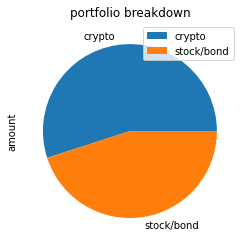

In [49]:
savings_df.plot.pie(y='amount',title='portfolio breakdown')

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value=monthly_income*3
emergency_fund_value

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio>emergency_fund_value:
    print("congrats you exceed the emergency fund")
elif (total_portfolio==emergency_fund_value):
    print("congrats you meet the emergency fund")
else :
    print("you are",emergency_fund_value-total_portfolio,"away from the emergency fund requirement")    

congrats you exceed the emergency fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
tickers=['SPY','AGG']
timeframe = "1D"
start_date = pd.Timestamp("2018-11-21", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-11-21", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000


In [29]:
start_date

'2018-11-21T00:00:00-05:00'

In [30]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
df_prices = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df
# Review the first 5 rows of the Alpaca DataFrame


# Display both the first and last five rows of the DataFrame
df_portfolio

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2021-11-19 00:00:00-05:00  114.49  114.59  114.415  114.45  4843203  469.61   

                                                            
                             high    low   close    volume  
time                                                        
2021-11-19 00:00:00-05:00  470.94  468.5  468.91  49009452

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [31]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_30year = MCSimulation(
  portfolio_data = df_prices,
  weights = [.40,.60],
  num_simulation = 500,
  num_trading_days = 252*30
)
# Review the simulation input data
MC_30year.portfolio_data.head()


AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2018-11-21 00:00:00-05:00  104.60  104.69  104.58  104.680  5492705.0   
2018-11-23 00:00:00-05:00  104.84  104.84  104.65  104.650  1536835.0   
2018-11-26 00:00:00-05:00  104.67  104.67  104.59  104.630  3510989.0   
2018-11-27 00:00:00-05:00  104.58  104.74  104.58  104.660  3845971.0   
2018-11-28 00:00:00-05:00  104.63  104.91  104.57  104.855  8221108.0   

                                           SPY                              \
                          daily_return    open      high       low   close   
time                                                                         
2018-11-21 00:00:00-05:00          NaN  265.86  267.1500  264.2527  265.08   
2018-11-23 00:00:00-05:00    -0.000287  263.18  265.0662  263.0700  263.34   
2018-11-26 00:00:00-05:00    -0.000191  265.78  268.2909  263.3652  267.46   
2018-11-27 00:00:00-05:00     0.000287  266.34  268.3700  265.6600  268.34   
2018-11-28 00:00:00-05:00     0.001863  269.60  275.1000  268.3272  274.50   

                                                   
                              volume daily_return  
time                                               
2018-11-21 00:00:00-05:00   64743156          NaN  
2018-11-23 00:00:00-05:00   36245484    -0.006564  
2018-11-26 00:00:00-05:00   67385154     0.015645  
2018-11-27 00:00:00-05:00   65180166     0.003290  
2018-11-28 00:00:00-05:00  111668695     0.022956

In [32]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996891,1.003809,0.999464,1.012963,1.004706,1.005257,0.991381,1.003463,1.007617,0.996055,...,1.007534,1.004053,1.007009,0.997612,1.002081,1.006375,1.001356,1.011563,0.993275,0.998522
2,0.997546,1.010845,1.003407,1.005978,1.018307,1.004046,0.996565,1.009041,0.994885,0.998973,...,1.002817,1.006550,0.998667,0.993238,1.013874,0.996048,1.007304,1.011521,0.999536,1.003324
3,0.989270,1.017483,1.001182,1.009531,1.014483,1.015447,0.985803,1.008507,0.994329,1.006152,...,0.995135,0.997679,1.002767,0.995640,1.005313,0.992749,0.995003,0.999468,0.997503,1.007514
4,0.977192,1.010164,1.005946,1.009394,1.003805,1.014871,0.997181,1.006212,0.992278,1.007180,...,0.988375,1.002051,1.004435,0.988052,1.024378,0.987123,0.997388,0.999060,0.992486,1.013195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,99.239041,35.408479,60.103257,386.604723,32.827738,44.469416,105.032915,127.391156,18.226039,47.452690,...,28.644182,39.879185,102.554801,73.092822,64.301625,25.290358,96.028506,24.745398,63.501089,52.566829
7557,99.082968,35.432816,59.616900,387.899720,33.232404,44.615241,106.479873,126.569972,18.208512,46.993552,...,28.142503,40.132737,102.572213,71.707174,64.302566,25.569672,95.874595,24.772173,64.034658,52.273721
7558,98.446572,35.192239,59.050846,388.463166,33.733616,44.802686,105.504379,126.723804,18.180802,47.788817,...,28.369247,39.931006,103.217679,70.899231,64.271972,25.615827,96.543771,25.078932,64.126525,52.828320
7559,98.921613,35.477406,58.169131,385.877191,34.164147,45.572126,103.868836,125.939883,18.298272,48.210724,...,28.360971,40.092769,105.268671,70.196711,64.147526,25.636855,96.245135,25.256589,63.255805,51.933632


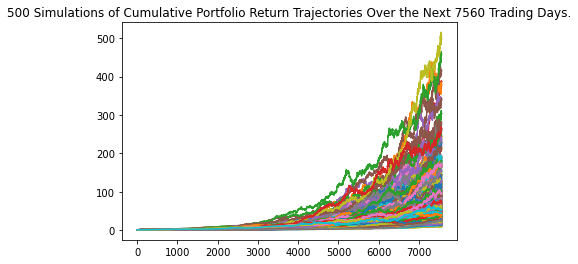

In [33]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_30year.plot_simulation()



#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

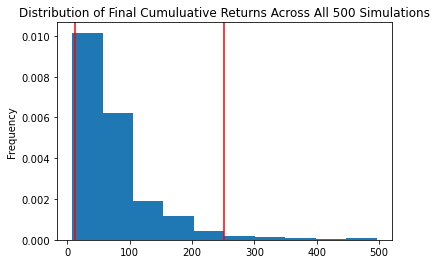

In [34]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_30year.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [35]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_30year.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_summary_statistics)

count           500.000000
mean             75.949218
std              65.729520
min               7.602785
25%              35.272866
50%              57.085995
75%              90.812772
max             496.014872
95% CI Lower     12.870526
95% CI Upper    251.494860
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [36]:
# Print the current balance of the stock and bond portion of the members portfolio
print("Stock:",spy_value)
print("Bond:",agg_value)
print("Total:",total_stocks_bonds)

Stock: 51580.100000000006
Bond: 22890.0
Total: 74470.1


In [37]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_summary_statistics[8]*total_stocks_bonds
ci_upper_thirty_cumulative_return = MC_summary_statistics[9]*total_stocks_bonds

# Print the result of your calculations
print("lower:",ci_lower_thirty_cumulative_return)
print("higher:",ci_upper_thirty_cumulative_return)

lower: 958469.3833549588
higher: 18728847.3572548


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [38]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
  portfolio_data = df_prices,
  weights = [.20,.80],
  num_simulation = 500,
  num_trading_days = 252*10
)
# Review the simulation input data
MC_10year.portfolio_data.head()


AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2018-11-21 00:00:00-05:00  104.60  104.69  104.58  104.680  5492705.0   
2018-11-23 00:00:00-05:00  104.84  104.84  104.65  104.650  1536835.0   
2018-11-26 00:00:00-05:00  104.67  104.67  104.59  104.630  3510989.0   
2018-11-27 00:00:00-05:00  104.58  104.74  104.58  104.660  3845971.0   
2018-11-28 00:00:00-05:00  104.63  104.91  104.57  104.855  8221108.0   

                                           SPY                              \
                          daily_return    open      high       low   close   
time                                                                         
2018-11-21 00:00:00-05:00          NaN  265.86  267.1500  264.2527  265.08   
2018-11-23 00:00:00-05:00    -0.000287  263.18  265.0662  263.0700  263.34   
2018-11-26 00:00:00-05:00    -0.000191  265.78  268.2909  263.3652  267.46   
2018-11-27 00:00:00-05:00     0.000287  266.34  268.3700  265.6600  268.34   
2018-11-28 00:00:00-05:00     0.001863  269.60  275.1000  268.3272  274.50   

                                                   
                              volume daily_return  
time                                               
2018-11-21 00:00:00-05:00   64743156          NaN  
2018-11-23 00:00:00-05:00   36245484    -0.006564  
2018-11-26 00:00:00-05:00   67385154     0.015645  
2018-11-27 00:00:00-05:00   65180166     0.003290  
2018-11-28 00:00:00-05:00  111668695     0.022956

In [39]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.015857,1.010466,0.983918,1.012031,1.007408,1.016149,0.998811,1.010825,1.002670,0.999693,...,1.004909,1.009199,0.996206,0.983939,0.976086,0.994870,1.000880,1.001197,1.016521,1.013770
2,1.015172,1.008738,0.983414,1.008177,0.995384,0.990579,0.994790,1.006749,1.007137,0.999732,...,0.994272,1.025406,0.999060,0.986206,0.969756,1.014413,1.015733,0.992381,1.037438,1.009166
3,1.012251,1.009243,0.995373,1.000846,1.008959,0.980801,1.008554,0.996163,1.022966,0.989129,...,1.008347,1.040019,0.982538,0.985938,0.952939,1.004986,1.010375,0.992232,1.052431,0.993710
4,1.009344,1.020581,1.009825,0.978582,1.008211,0.983016,1.016903,0.989168,1.019200,0.990357,...,1.004099,1.038904,1.004725,0.991977,0.945458,1.015020,1.014290,1.008590,1.035702,0.984583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.044142,2.900620,2.871139,6.841236,4.416601,7.886352,2.925484,5.258719,10.421791,1.820439,...,4.544476,10.645035,3.353296,16.973386,7.216653,4.571621,6.905879,3.350284,13.940961,7.141428
2517,4.053904,2.940405,2.933611,6.947012,4.426898,7.815675,2.935200,5.248931,10.468419,1.849402,...,4.557322,10.540783,3.390730,16.968240,7.161898,4.613270,6.856707,3.335083,13.645144,7.169206
2518,4.111198,2.922842,2.965308,7.022742,4.505243,7.868487,2.950425,5.234334,10.492743,1.845756,...,4.499372,10.591176,3.355430,17.098174,7.149091,4.589776,6.729597,3.384108,13.837595,7.179954
2519,4.115372,2.971831,2.969710,6.985500,4.527472,7.846978,2.963571,5.249049,10.725665,1.862517,...,4.469747,10.544542,3.338500,17.189585,7.276673,4.591954,6.772011,3.396973,13.761928,7.284197


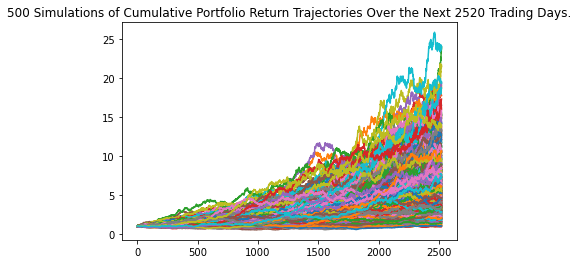

In [40]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_10year.plot_simulation()




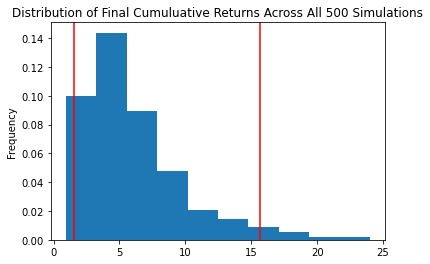

In [41]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_10year.plot_distribution()

In [42]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
MC_summary_statistics = MC_10year.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_summary_statistics)

count           500.000000
mean              5.990392
std               3.788708
min               0.925725
25%               3.339115
50%               4.993881
75%               7.412005
max              24.022269
95% CI Lower      1.513365
95% CI Upper     15.685408
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [43]:
# Print the current balance of the stock and bond portion of the members portfolio
print("Stock:",spy_value)
print("Bond:",agg_value)
print("Total:",total_stocks_bonds)

Stock: 51580.100000000006
Bond: 22890.0
Total: 74470.1


In [44]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_summary_statistics[8]*total_stocks_bonds
ci_upper_ten_cumulative_return = MC_summary_statistics[9]*total_stocks_bonds

# Print the result of your calculations
print("lower:",ci_lower_ten_cumulative_return)
print("upper:",ci_upper_ten_cumulative_return)

lower: 112700.40819403855
upper: 1168093.8760238972


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?